In [131]:
%matplotlib inline
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_distribution, array_to_latex, plot_bloch_multivector
from qiskit.primitives import Sampler
from qiskit.quantum_info import Statevector
from qiskit.circuit import Parameter
from qiskit_aer import AerSimulator
from qiskit.quantum_info.operators import Operator
import numpy as np

In [5]:
def get_player(parameter, name=""):
    player = QuantumCircuit(1, name=name)
    player.ry(parameter, 0)
    return player

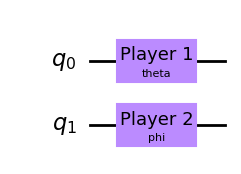

In [109]:
theta = Parameter('theta')
phi = Parameter('phi')

player_1 = get_player(theta, name="Player 1")
player_2 = get_player(phi, name="Player 2")

qc = QuantumCircuit(2)
qc.append(player_1, [0])
qc.append(player_2, [1])
qc.draw('mpl', style="clifford")

<IPython.core.display.Latex object>

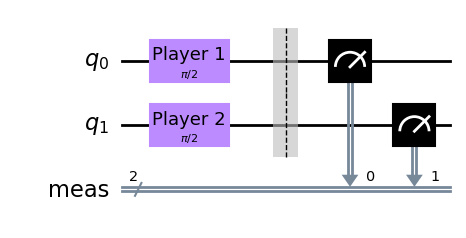

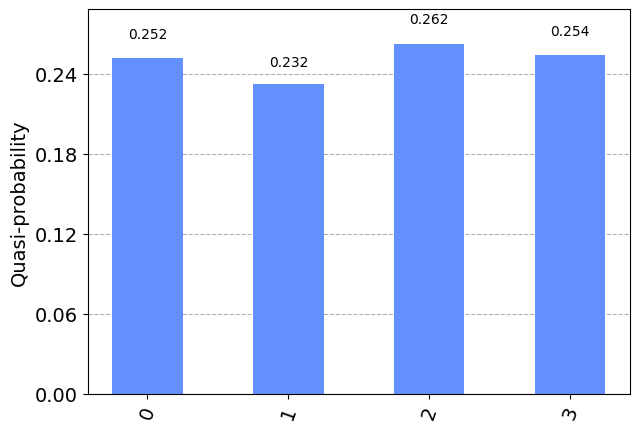

In [110]:
sampler = Sampler()
qc_p = qc.assign_parameters({theta:np.pi/2, phi:np.pi/2})
display(Statevector(qc_p).draw('latex'))
qc_p.measure_all()
display(qc_p.draw('mpl', style="clifford"))
result = sampler.run(qc_p, shots=1000).result().quasi_dists
plot_distribution(result)

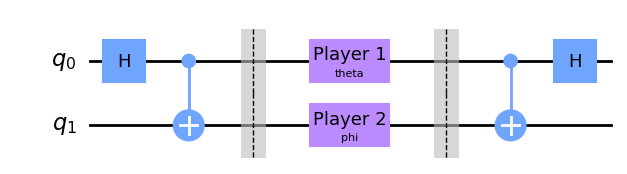

In [127]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.barrier()
qc.append(player_1, [0])
qc.append(player_2, [1])
qc.barrier()
qc.cx(0, 1)
qc.h(0)

qc.draw('mpl', style="clifford")

In [128]:
rate_to_refuse = lambda rate : np.arcsin(np.sqrt(rate/100))*2

In [129]:
qc_p = qc.assign_parameters({theta:rate_to_refuse(50), phi:rate_to_refuse(50)})
display(Statevector(qc_p).draw('latex'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

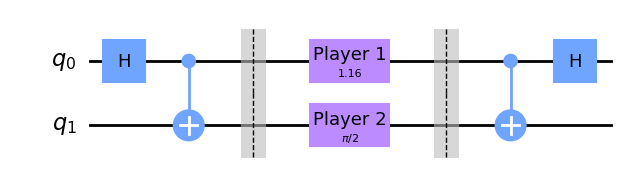

In [70]:
qc_p = qc.assign_parameters({theta:rate_to_refuse(30), phi:rate_to_refuse(50)})
display(Statevector(qc_p).draw('latex'))
display(qc_p.draw('mpl'))

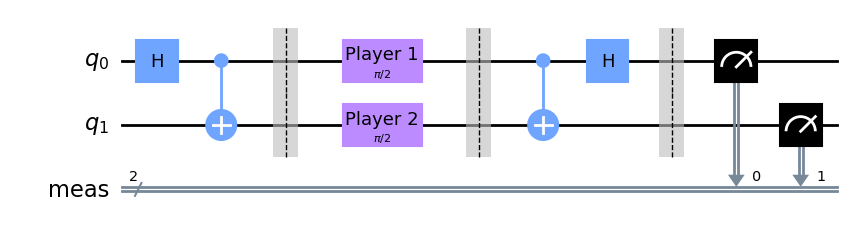

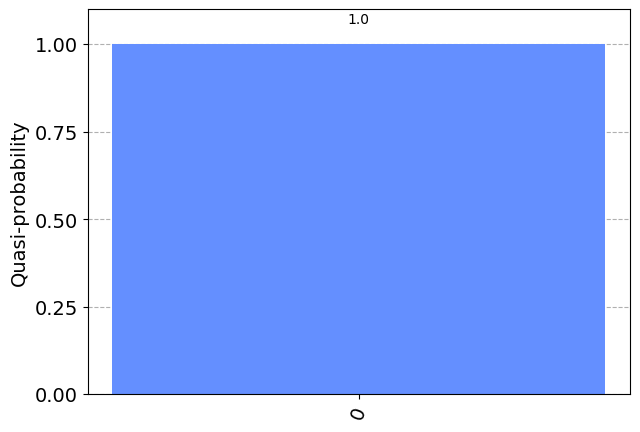

In [130]:
qc_p.measure_all()
display(qc_p.draw('mpl'))
result = sampler.run(qc_p, shots=1000).result().quasi_dists
plot_distribution(result)

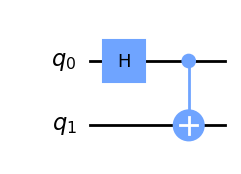

In [72]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.draw('mpl')

In [75]:
sim = AerSimulator()
qc_copy = qc.copy()
qc_copy.save_unitary()
result = sim.run(qc_copy).result().get_unitary()
array_to_latex(result, max_size=10000)

<IPython.core.display.Latex object>

In [84]:
I = np.matrix([[1, 0], [0, 1]])
X = np.matrix([[0, 1], [1, 0]])
j = (1/np.sqrt(2)) * ( np.kron(I, I) + np.kron((1j * X), X) )
array_to_latex(j, max_size=10000)

<IPython.core.display.Latex object>

In [102]:
J = Operator(j).to_instruction()
J.label = "J"
J_dagger = Operator(j.H).to_instruction()
J_dagger.label="$J^{\dagger}$"

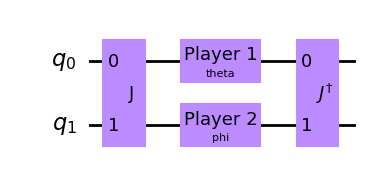

In [123]:
qc = QuantumCircuit(2)
qc.append(J, [0, 1])
qc.append(player_1, [0])
qc.append(player_2, [1])
qc.append(J_dagger, [0, 1])
qc.draw('mpl')

In [124]:
qc_p = qc.assign_parameters({theta:rate_to_refuse(70), phi:rate_to_refuse(50)})
display(Statevector(qc_p).draw('latex'))

<IPython.core.display.Latex object>

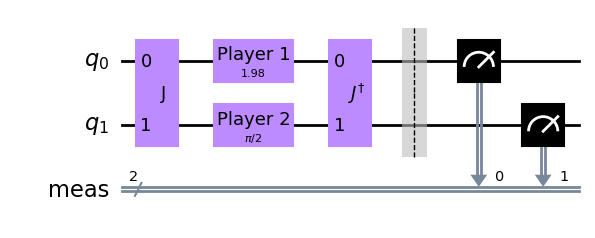

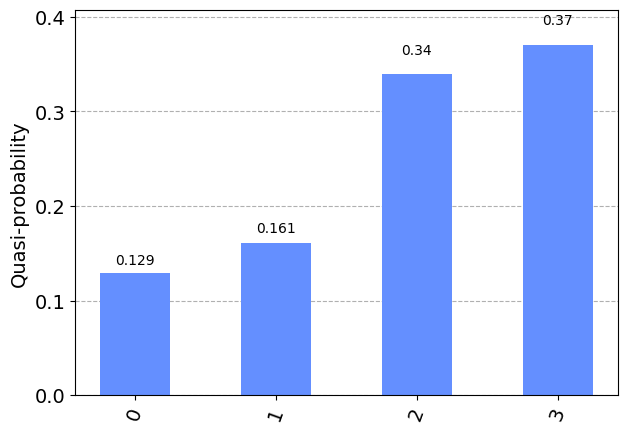

In [125]:
qc_p.measure_all()
display(qc_p.draw('mpl'))
result = sampler.run(qc_p, shots=1000).result().quasi_dists
plot_distribution(result)

---

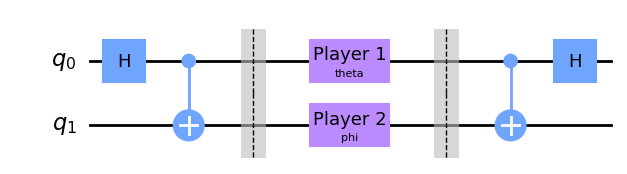

In [155]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.barrier()
qc.append(player_1, [0])
qc.append(player_2, [1])
qc.barrier()
qc.cx(0, 1)
qc.h(0)

qc.draw('mpl', style="clifford")

<IPython.core.display.Latex object>

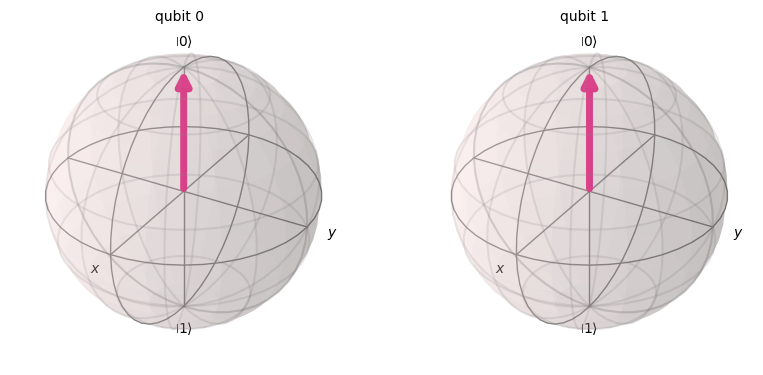

<IPython.core.display.Latex object>

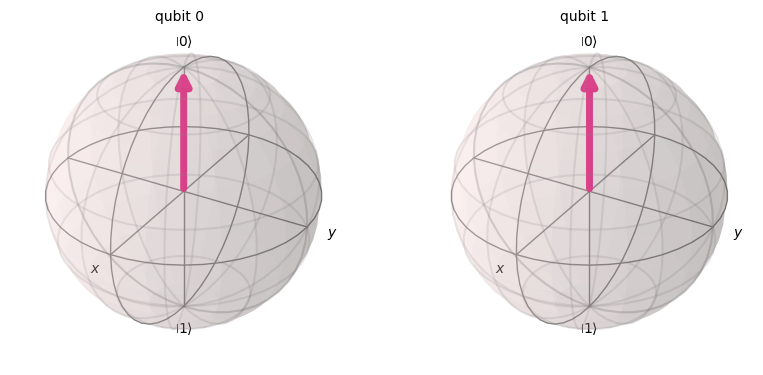

<IPython.core.display.Latex object>

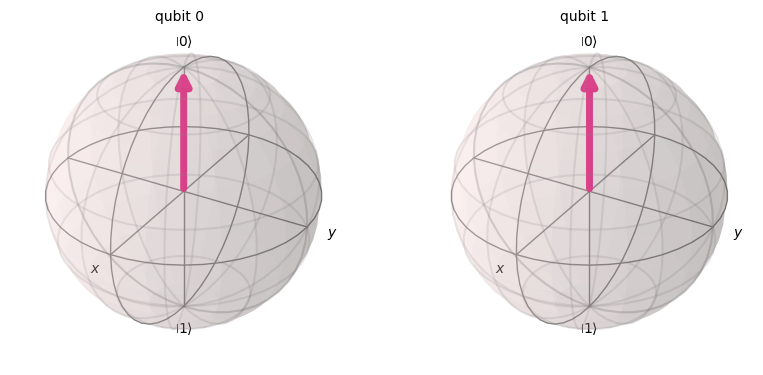

<IPython.core.display.Latex object>

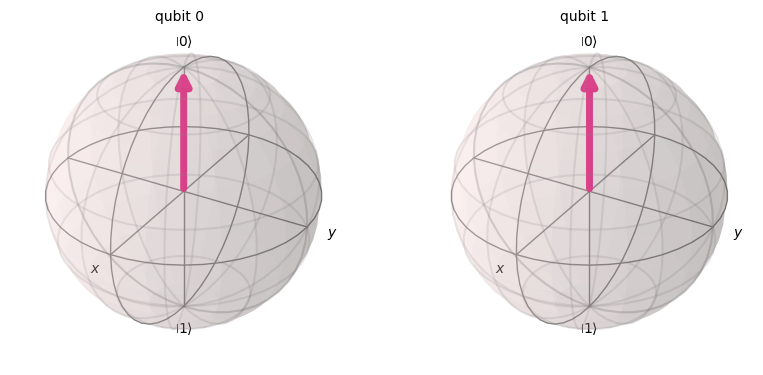

In [157]:
for parameter in [0, np.pi, np.pi/2, 2*np.pi]:
    qc_p = qc.assign_parameters({theta:0, phi:0})
    display(Statevector(qc_p).draw('latex'))
    display(plot_bloch_multivector(qc_p))